In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
import seaborn as sns
import json

In [12]:
df_dir = 'post_params_distribution/'
baseline_df = pd.read_csv(df_dir+'uniformZ_no_dust_tests_bagpipes.csv', index_col=0)
baseline_uniform = baseline_df[baseline_df['metallicity']=='uniform'].drop(columns=['metallicity'])
baseline_simulated = baseline_df[baseline_df['metallicity']=='simulated'].drop(columns=['metallicity'])

In [102]:
no_spec_mask_df = pd.read_csv(df_dir+'uniformZ_no_dust_tests_bagpipes_no_spec_mask.csv', index_col=0)
no_spec_mask_uniform = no_spec_mask_df[no_spec_mask_df['metallicity']=='uniform'].drop(columns=['metallicity'])
no_spec_mask_simulated = no_spec_mask_df[no_spec_mask_df['metallicity']=='simulated'].drop(columns=['metallicity'])

In [13]:
fixed_tform_df = pd.read_csv(df_dir+'uniformZ_no_dust_tests_bagpipes_fixed_tform.csv', index_col=0)
fixed_tform_uniform = fixed_tform_df[fixed_tform_df['metallicity']=='uniform'].drop(columns=['metallicity'])
fixed_tform_simulated = fixed_tform_df[fixed_tform_df['metallicity']=='simulated'].drop(columns=['metallicity'])

In [71]:
NP6bins_df = pd.read_csv(df_dir+'uniformZ_no_dust_tests_bagpipes_NP6bins.csv', index_col=0)
NP6bins_uniform = NP6bins_df[NP6bins_df['metallicity']=='uniform'].drop(columns=['metallicity'])
NP6bins_simulated = NP6bins_df[NP6bins_df['metallicity']=='simulated'].drop(columns=['metallicity'])

In [72]:
# truth dict
truth_dict = json.load(open(df_dir+'truth_dict.json','r'))

In [103]:
def add_violin_plot(param, uniform_df, simulated_df, truth_dict, ax1, ax2, no_ystuff=False):
    sns.violinplot(x='dust',y=param, ax=ax1, data=uniform_df, hue='noise', split=True, bw=0.2)
    xlim = ax1.get_xlim()
    ax1.plot(np.arange(2+2)-1, [truth_dict[param]]*(2+2), 'k--', alpha=0.5)
    ax1.scatter(np.arange(2), [truth_dict[param]]*2, color='r', marker='x', s=100, zorder=5, 
               label='truths')
    ax1.legend(labels=[])
    ax1.set_xlim(xlim)
    if no_ystuff:
        ax1.set_ylabel('')
        plt.setp(ax1.get_yticklabels(), visible=False)
    ax1.set_title('uniform')

    sns.violinplot(x='dust',y=param, ax=ax2, data=simulated_df, hue='noise', split=True, bw=0.2)
    ax2.plot(np.arange(2+2)-1, [truth_dict[param]]*(2+2), 'k--', alpha=0.5)
    ax2.scatter(np.arange(2), [truth_dict[param]]*2, color='r', marker='x', s=100, zorder=5, 
               label='truths')
    ax2.set_xlim(xlim)
    ax2.set_ylabel('')
    plt.setp(ax2.get_yticklabels(), visible=False)
    ax2.set_title('simulated')

def violin_plot(param):
    fig = plt.figure(figsize=[16,7])
    width = 9
    gs = gridspec.GridSpec(1,width*8+3, wspace=0)
    ax1 = plt.subplot(gs[0:width*1])
    ax2 = plt.subplot(gs[width*1:width*2], sharey=ax1)
    ax3 = plt.subplot(gs[width*2+1:width*3+1], sharey=ax1)
    ax4 = plt.subplot(gs[width*3+1:width*4+1], sharey=ax1)
    ax5 = plt.subplot(gs[width*4+2:width*5+2], sharey=ax1)
    ax6 = plt.subplot(gs[width*5+2:width*6+2], sharey=ax1)
    ax7 = plt.subplot(gs[width*6+3:width*7+3], sharey=ax1)
    ax8 = plt.subplot(gs[width*7+3:width*8+3], sharey=ax1)
    
    add_violin_plot(param, baseline_uniform, baseline_simulated, truth_dict, ax1, ax2)
    add_violin_plot(param, no_spec_mask_uniform, no_spec_mask_simulated, truth_dict, ax3, ax4, no_ystuff=True)
    add_violin_plot(param, fixed_tform_uniform, fixed_tform_simulated, truth_dict, ax5, ax6, no_ystuff=True)
    add_violin_plot(param, NP6bins_uniform, NP6bins_simulated, truth_dict, ax7, ax8, no_ystuff=True)

    plt.figtext(0.20,0.93,"Baseline", va="center", ha="center", size=15)
    plt.figtext(0.40,0.93,"no spec mask", va="center", ha="center", size=15)
    plt.figtext(0.60,0.93,"tform fixed", va="center", ha="center", size=15)
    plt.figtext(0.80,0.93,"NP - 6 bins", va="center", ha="center", size=15)
    
    plt.show()
    
    return fig

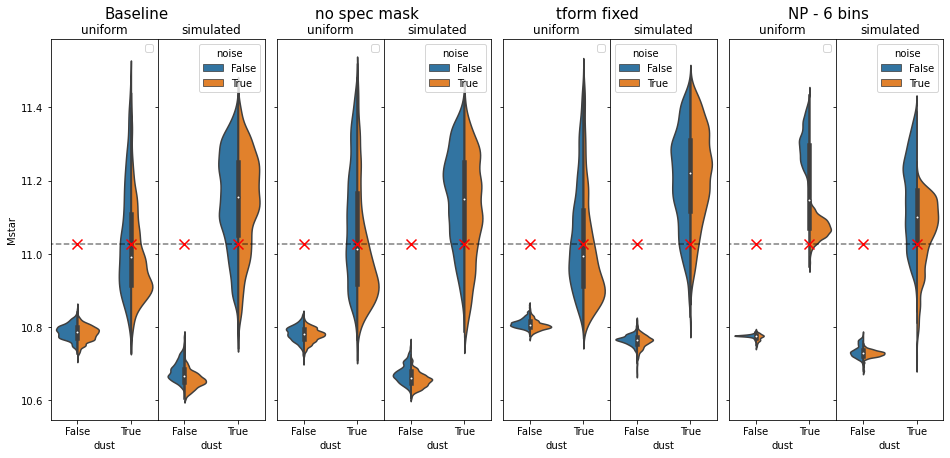

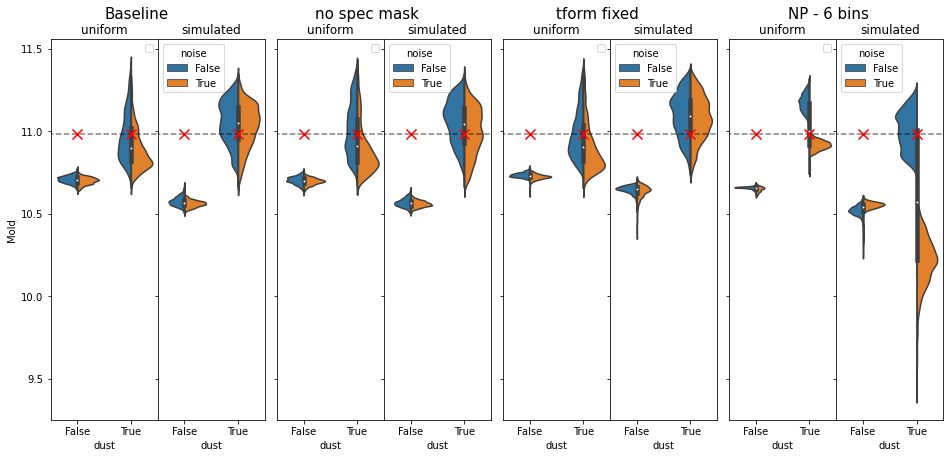

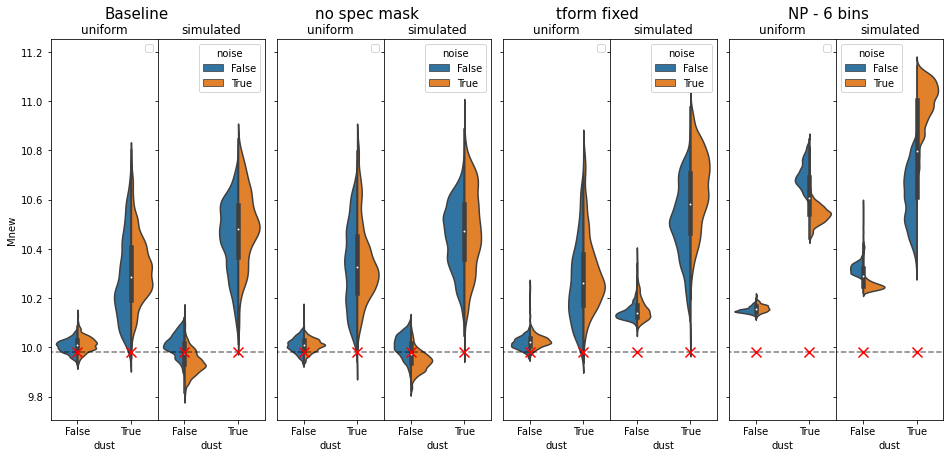

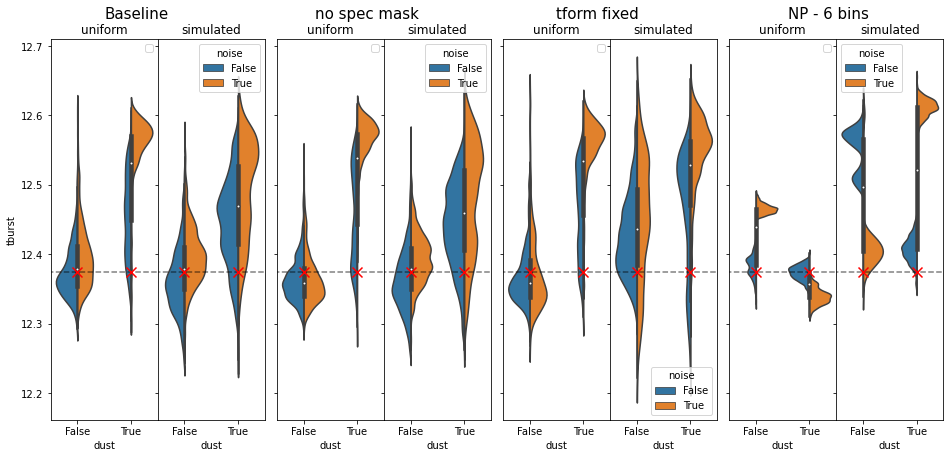

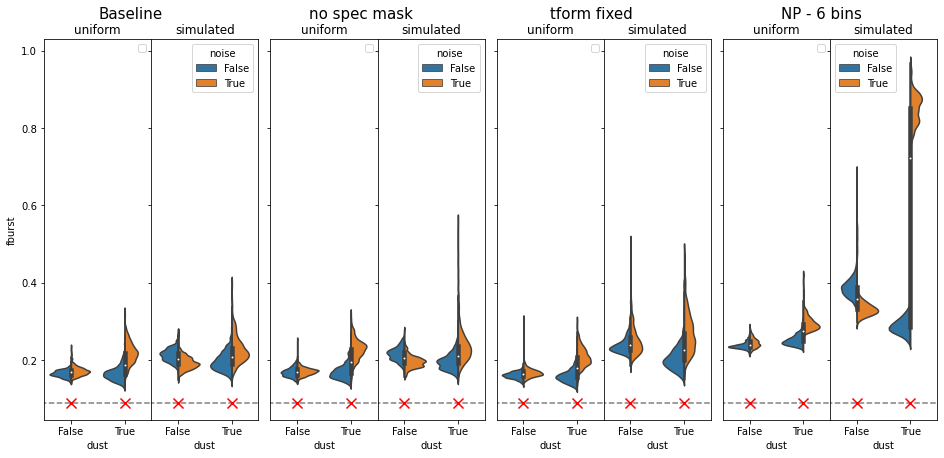

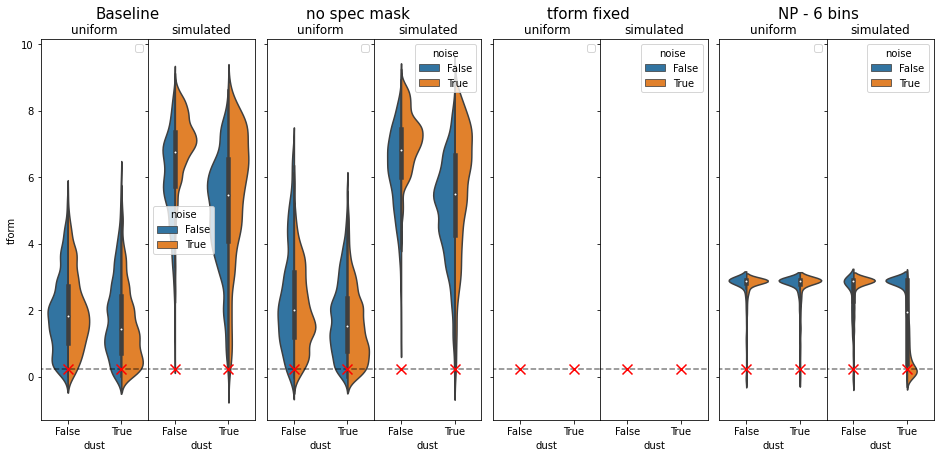

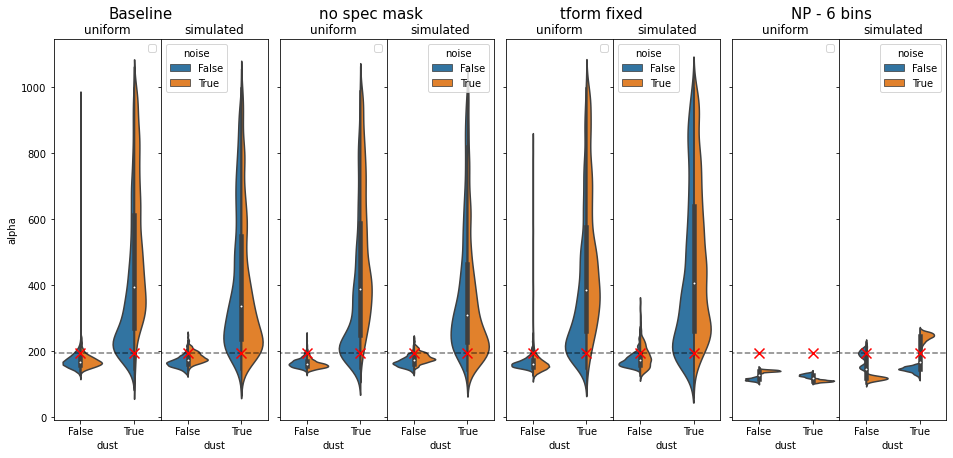

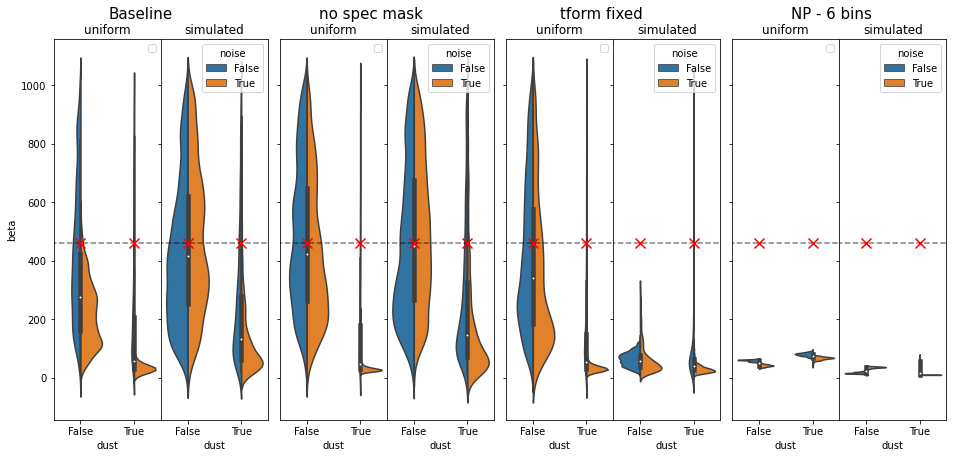

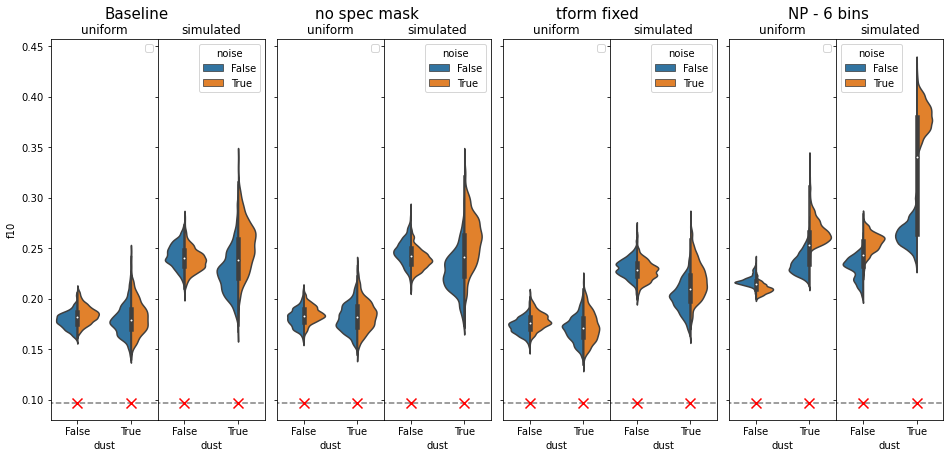

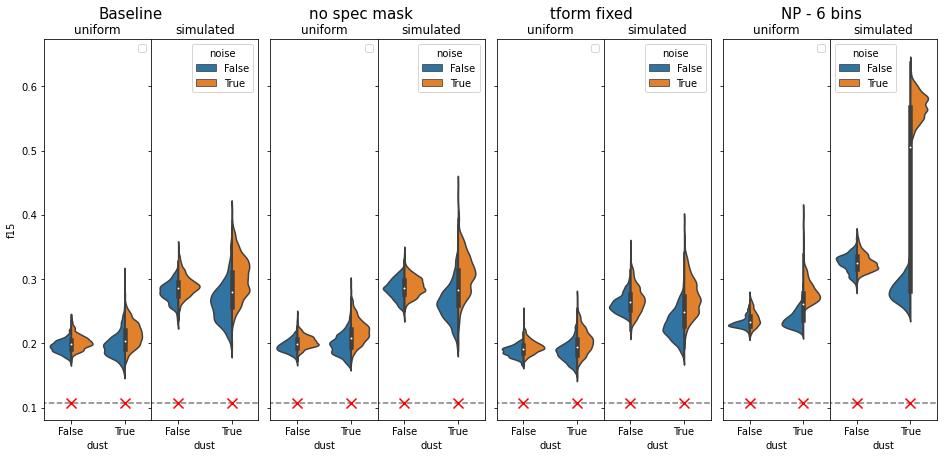

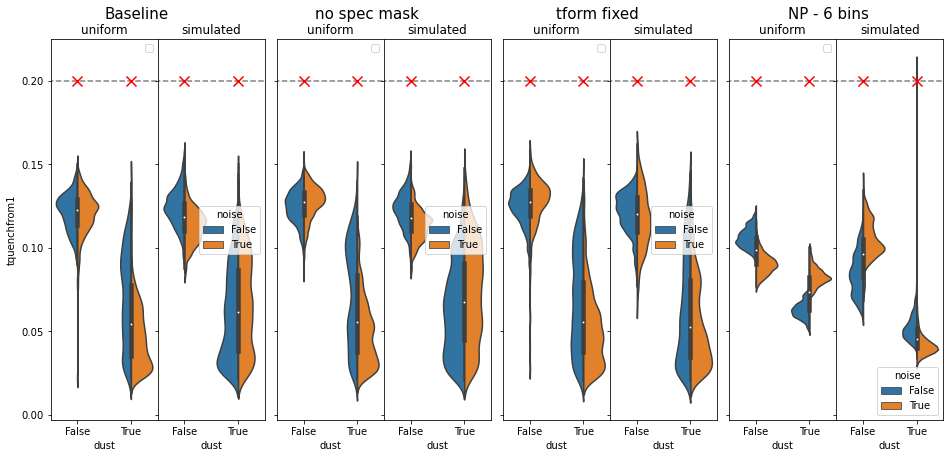

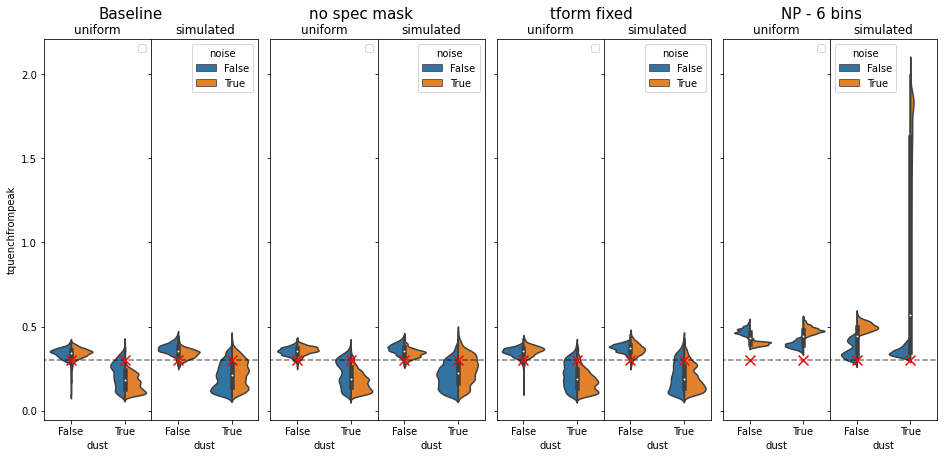

In [104]:
for param in ['Mstar', 'Mold', 'Mnew', 'tburst', 'fburst', 'tform', 'alpha', 'beta',
              'f10', 'f15', 'tquenchfrom1', 'tquenchfrompeak']:
    fig = violin_plot(param)